# Exploratory Data Analysis (EDA)

## Why EDA?

Because in order to start working with our data, we need to know what kind of data we are dealing with. And this detective work got itself the dry name of exploratory data analysis.

These are only some of the questions that we ask ourselves. Depending on the answer, we have to proceed with different processing steps before we can use any algorithms on our data:

1. Do we have 1000 or 1 million entries in our data?
2. Are we dealing with text or numbers?
3. Do we have dates? What format to these dates have?
4. Do we have outliers? (Data points that are extremely different than all the other ones)
5. Do we have missing data? That is, is any of the cells in our dataset empty?

If we just open our data, the ``.csv`` file, in a spreadsheet application say Microsoft Excel and look at it with the naked eye, we won't be able to tell much.

In order load our data...

In [1]:
%pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.6 MB/s eta 0:00:00


In [4]:
import pandas as pd

df = pd.read_excel("datasets/whr-2021.xls")

## Pandas, Numpy, Matplotlib, Seaborn

### Pandas
In the code right above, we just imported `pandas` library and used `read_csv` to read our csv data in a *Pandas DataFrame*.

Pandas is a software library created for data manipulation and analysis. Using `pandas` we can read various file formats easily into data structures specifically created for data manipulation procedures.

The most commonly used data structures in pandas are *Series* and *DataFrame*. Series stores one-dimensional data (like a table with only one column) and DataFrame stores 2-dimensional data (tables with multiple columns).

We are not going into much detail on pandas but the best place to learn pandas is the [official documentation](https://pandas.pydata.org/), but if during or after reading this you feel like you need a more thorough work session with pandas, please have a look at this [10 minutes](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to pandas tutorial (or way more than 10 minutes).

### Numpy
[Numpy](https://numpy.org/) is a library mainly used for the Mathematical functions it implements. This way we don't have to write the functions ourselves all the time.

### Matplotlib
Matplotlib brings us data visualisations.

### Seaborn
Seaborn takes visualisations to the next level: more powerful and more beautiful, and perhaps more abstract than Matplotlib.

In [5]:
# Let's set the precision to 4 decimal places
pd.set_option("display.precision", 4)

# The first 3 rows of our pandas DataFrame object. If we run df.head(), it will display the first 5 rows by default.To display the first 3 rows...
df.head(3)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.0316,7.9041,7.7801,10.7752,0.9536,72.0000,0.9493,-0.0978,0.1858,2.4303,1.4464,1.1062,0.7408,0.6906,0.1242,0.4805,3.2534
1,Denmark,Western Europe,7.6195,0.0347,7.6874,7.5516,10.9332,0.9544,72.6998,0.9456,0.0301,0.1788,2.4303,1.5015,1.1080,0.7629,0.6862,0.2076,0.4850,2.8683
2,Switzerland,Western Europe,7.5715,0.0362,7.6425,7.5005,11.1174,0.9417,74.4001,0.9188,0.0246,0.2917,2.4303,1.5659,1.0795,0.8164,0.6535,0.2040,0.4130,2.8391


Pandas makes it very easy to handle tabular data.

Tabular data means that our data fits or belongs in a table. Other types of data can be visual (that is, images, for which it doesn't really make sense to be stored as csv files).

The standard way to store tabular data is that:

* Each row represents a different observation. 
* Observation is a fancy Statistics term, but it just means a new data point, a new measurement did by this group of [researchers](https://worldhappiness.report/about/). 

#### Row and column
If our data is about happiness in various countries, each row contains data for a new country. Each column is a different feature (or attribute) of our observations. For the World Happiness Report dataset, examples of features can be the `Country` name, the `Regional indicator` or the `Social Support score`.

Now, let's use the `numpy` library to see the maximum value of the feature Ladder score across all observations in our dataset (all countries).

In [6]:
# Let's import the numpy library
import numpy as np

# Use a numpy function to see what's the maximum value for our Ladder score feature
np.max(df["Ladder score"])

7.842100143432617

And since we're here, let's see how convenient it is to use pandas *DataFrame* structure. We found the maximum values for "Ladder score" feature, but what is the row number of the entry with the `max()` *Ladder score*?

In [7]:
df['Ladder score'].argmax()

0

It only took one line of code to find the row number. Let's see this observation's features, to convince ourselves we got the right entry. Note that when displaying one single entry from the DataFrame, the feature values won't appear 0 a row anymore, but will be displayed as a column.

In [8]:
df.iloc[df['Ladder score'].argmax()]

Country name                                         Finland
Regional indicator                            Western Europe
Ladder score                                          7.8421
Standard error of ladder score                        0.0316
upperwhisker                                          7.9041
lowerwhisker                                          7.7801
Logged GDP per capita                                10.7752
Social support                                        0.9536
Healthy life expectancy                                 72.0
Freedom to make life choices                          0.9493
Generosity                                           -0.0978
Perceptions of corruption                             0.1858
Ladder score in Dystopia                              2.4303
Explained by: Log GDP per capita                      1.4464
Explained by: Social support                          1.1062
Explained by: Healthy life expectancy                 0.7408
Explained by: Freedom to

## Data types

We have some idea about or features types just by looking at the .csv file. But a better and **systemic** method is the one below.

In [9]:
# DataFrame has this very handy method.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

What do we see in the output above?

* Our data is a DataFrame, with 149 entries (from 0 to 148)
* We have 20 columns (from 0 to 19)
* All of the columns have 149 non-null values (we don't have **missing** data in any of these columns)
* Column types are: object (2 of them) and float64 (18 of them). *float64 means they can store fractional numbers and each number takes 64 bits*

* The 'object' type we see above most likely refers to a string. We'll use [DataFrame indexing and selection](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) to look at one particular value to verify our assumption.

In [11]:
print(df['Country name'][0])

Finland


Ok, so, in this case, 'object' means String.

## Exploring categorical variable

We have 2 feature which contain text:

1. Country
2. Region

### Country
Our intuition is that each country is unique in our dataset (one country per row). This is what we would expect from a study of happiness levels in different countries across the world. We can verify this assumption, to make sure we don't have errors in our data. For example, the social scientist running this study could have accidentally entered the same observation twice because she was working late to finish her data analysis.

In [9]:
# How many entries we have for each country shown in descending order (highest value first)
df["Country name"].value_counts().sort_values(ascending = False)

Country name
Finland         1
North Cyprus    1
Switzerland     1
Iceland         1
Netherlands     1
               ..
Malawi          1
Lesotho         1
Botswana        1
Rwanda          1
Afghanistan     1
Name: count, Length: 149, dtype: int64

In [12]:
# Uncomment the line below to see what data type we used. This is a nice way to explore the functioning of pandas.
print("\nThe code above returns a date of type: ", type(df['Country name'].value_counts()))


The code above returns a date of type:  <class 'pandas.core.series.Series'>


### Region
Let's have a look at the regions now. It would be interesting to see what different regions we have. This would open the door for questions like: *Are people happier in Western Europen than in Eastern Europe?*. We don't know yet what question we can ask and exploring our data informs our next steps.

By the way, since we are dealing with long column names, it's worth mentioning that we don't have to type the whole column name. I just input the first 3 letters and press Tab for autocomplete.

We see in the output below that:

* Europe is split into 2: **Western Europe** and **Central and Eastern Europe**
* The Americas are divided into 2: **Latin America and Caribbean** and **North America and ANZ** (which is North America, Australia and New Zealand)
* Africa is split into 2: **Sub-Saharan Africa** and **Middle East and North Africa**
* Asia is divided into 3: **Southeast Asia**, **South Asia** and **East Asia**
* There is a group of post-Soviet republics in Eurasia making up the **Commonwealth of Independent States**

In [13]:
# Here's each individual region and its corresponding frequency (the statistical term for the number of times this region appears in our dataset)

df['Regional indicator'].value_counts()

Regional indicator
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: count, dtype: int64

In [14]:
# Method to find this out total number of regions in our dataset
print(f"The number of regions in our dataset is: {df['Regional indicator'].nunique()}")

The number of regions in our dataset is: 10


The above line of code uses Python's fancy formatting called *Literal String Interpolation* (but the popular name is f-string). You can read more [here](https://www.programiz.com/python-programming/string-interpolation).

### Visualisation for categorical features
Since the frequencies (the number of times they appear in our dataset) of our regions is greater than one, it invites us to look at them in a more intuitive way rather than the text displayed above.

It is generally much better for the audience to present any data in visual form, whenever possible. For countries, nothing else made sense since each country appeared once in our data. But for regions, we can use a bar chart.

The bar chart below shows the same information as the table we've seen earlier.
But in visual form it's so much easier to gain insights like **Sub-Saharan Africa** is present in our dataset approximately twice as much as the next region in line, **Western Europe**.

<Axes: title={'center': 'Absolute frequency distribution of Regional indicator'}, xlabel='Regional indicator'>

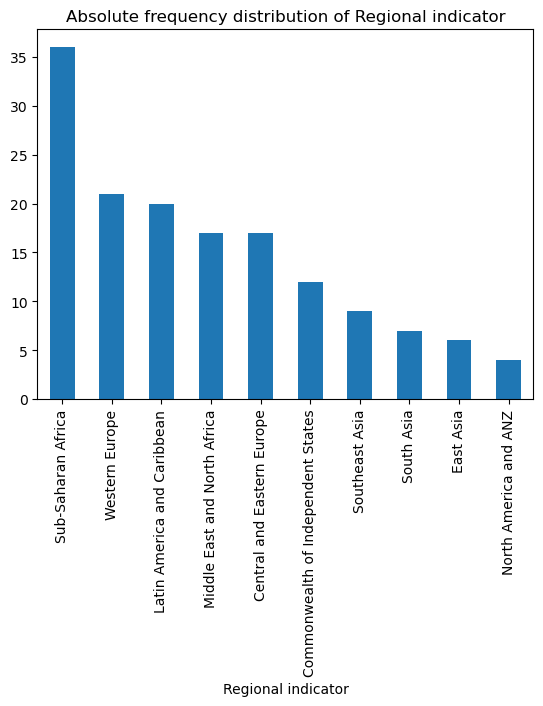

In [15]:
df['Regional indicator'].value_counts().plot(kind='bar', title='Absolute frequency distribution of Regional indicator')

Another obsvervation for the plot above is that those numbers are absolute frequencies. That is, the bar chart shows the number of times each region is present in our dataset. Sometimes it's enough to know that we have 39 countries from **Sub-Saharan Africa**. But there are times when we're wondering how much this represents in terms of percentage.

<Axes: title={'center': 'Relative frequency of Regional indicators'}, xlabel='Regional indicator'>

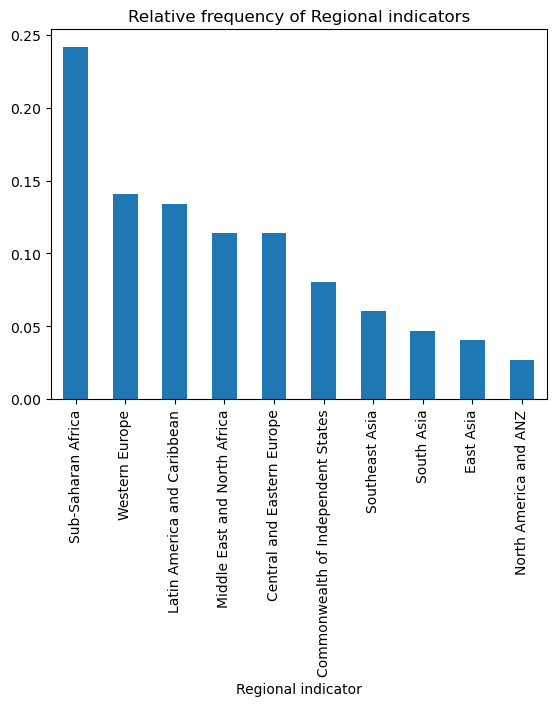

In [16]:
(df['Regional indicator'].value_counts()/df.shape[0]).plot(kind='bar', title='Relative frequency of Regional indicators')

Now we know that **Sub-Saharan Africa** represents 25% of our data. 

For this dataset this is not unusual. But imagine if you're trying to see how happy people are in a single country, you broadcast a digital survey that people can take and during data analysis you realise that 25% of the people who filled in the survey are from the same city in this country.

So how do we go about this?

## Exploring Numerical Features

Pandas has a nice built-in method that performs descriptive statistics on a DataFrame.

It shows us:

1. number of values for each feature (we could see if we have missing values for any feature)
2. mean value
3. standard error
4. min and max value
5. median of our data (50%)
6. lower and upper quartile (25% and 75%)

In [17]:
df. describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000,149.0000
mean,5.5328,0.0588,5.6480,5.4177,9.4322,0.8147,64.9928,0.7916,-0.0151,0.7275,2.4303,0.9772,0.7933,0.5201,0.4987,0.1781,0.1351,2.4303
std,1.0739,0.0220,1.0543,1.0949,1.1586,0.1149,6.7621,0.1133,0.1507,0.1793,0.0000,0.4048,0.2588,0.2130,0.1379,0.0983,0.1143,0.5377
min,2.5229,0.0256,2.5965,2.4493,6.6353,0.4626,48.4780,0.3817,-0.2882,0.0820,2.4303,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6485
25%,4.8518,0.0434,4.9911,4.7057,8.5410,0.7498,59.8016,0.7181,-0.1265,0.6666,2.4303,0.6658,0.6470,0.3566,0.4092,0.1055,0.0604,2.1383
50%,5.5335,0.0542,5.6247,5.4131,9.5687,0.8319,66.6031,0.8044,-0.0360,0.7806,2.4303,1.0248,0.8320,0.5708,0.5143,0.1645,0.1012,2.5094
75%,6.2554,0.0699,6.3443,6.1280,10.4212,0.9047,69.6000,0.8773,0.0788,0.8446,2.4303,1.3227,0.9960,0.6652,0.6030,0.2394,0.1739,2.7936
max,7.8421,0.1727,7.9041,7.7801,11.6466,0.9829,76.9529,0.9701,0.5416,0.9393,2.4303,1.7508,1.1723,0.8968,0.7160,0.5412,0.5468,3.4825


### Insights from statistics above

1. Ladder score actually goes from $2.5$ to $7.8$. There's no $0$ or $10$.
2. Healthy life expectancy has a minimum of $45$ and a maximum of $76$. This is a large range. There are countries in our dataset where life expenctancy is $45$ years!
3. Generosity can be negative. It's the only feature that has negative values.
4. Other features are more difficult to interpret from the descriptive stats above.

Numerical data is best viewed as histograms. We will use both [matplotlib](https://matplotlib.org) and [seaborn](https://seaborn.pydata.org) for this.

/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

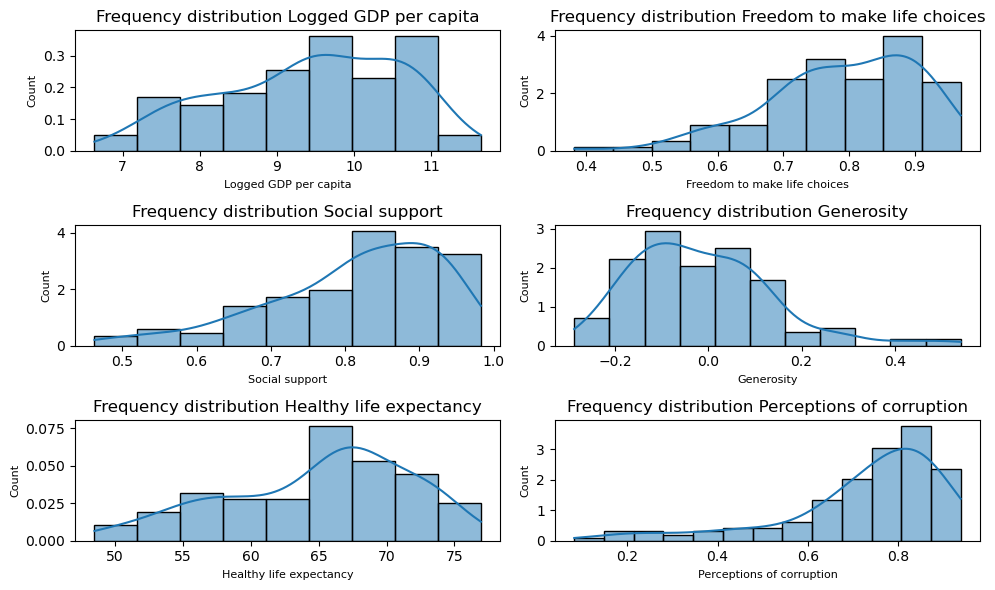

In [29]:
# required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# column name in our dataset
columns = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# determine number of rows
scols = int(len(columns)/2)
srows = 2

# grid of plots
fig, axes = plt.subplots(scols, srows, figsize=(10,6))

for i, col in enumerate(columns):
    ax_col = int(i%scols)
    ax_row = int(i/scols)
    
    sns.histplot(data=df[col], kde=True, stat="density", ax=axes[ax_col, ax_row])
    axes[ax_col, ax_row].set_title('Frequency distribution '+ col, fontsize=12)
    axes[ax_col, ax_row].set_xlabel(col, fontsize=8)
    axes[ax_col, ax_row].set_ylabel('Count', fontsize=8)

fig.tight_layout()

### Insights from the visual exploration of our numerical data (histogram)

1. Distributions of GDP, social support, healthy life expectancy, freedom and corruption are all left skewed (or negative skew). 
2. In other words, most of the values do not happen to be in the middle of the *min-max* range, but are pushed towards the upper end of the range - happen for all but **Perception of corruption**. This is good news.
3. Generosity, though, is right skewed. The majority of the countries are in the bottom half of the generosity scale (unfortunately).

## Bivariate analysis

All the explorations above belong to [univariate](https://en.wikipedia.org/wiki/Univariate_(statistics)) analysis (that is, we looked at each variable individually). We can also perform [bivariate analysis](https://en.wikipedia.org/wiki/Bivariate_analysis), which instead of looking individually, we can look at pairs of two variables to explore a possible relation between them.

The ideal way to perform this by is using scatterplots to search for clouds of dots that arrange themselves into straight diagonal lines. This is a visual representation of two variables that correlate.

/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

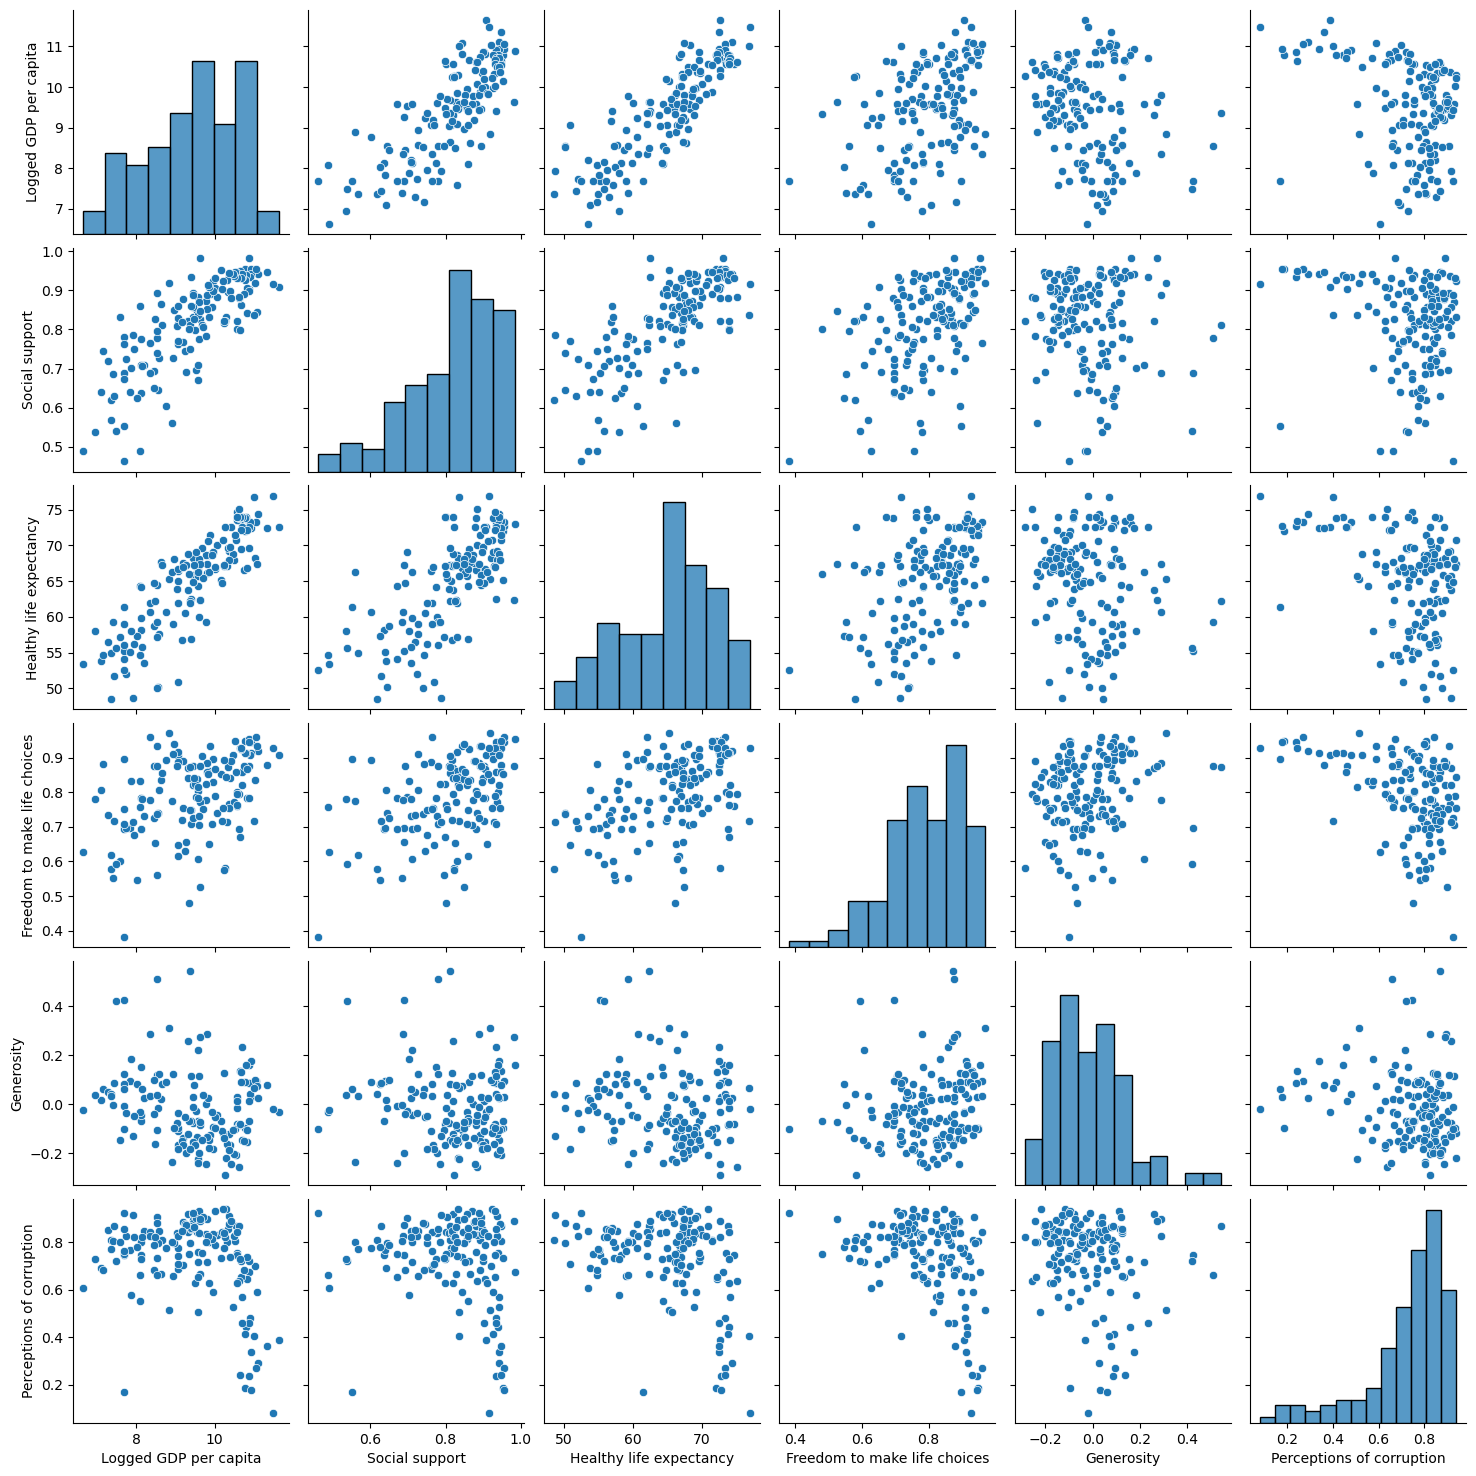

In [30]:
columns = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# do scatterplots
sns.pairplot(df[columns])

### How to read the plots above?

Let's look at the second plot on the first row. On the far left of the image we see *Logged GDP per capita*. All plots on the first row have on the y axis (the vertical axis) the *Logged GDP per capita* as the label of the Y axis. Now look at the bottom of the plots, all the way down, under the second column we have *Social support* as the name of the X axis. All plots on the second columns have the *Social support* on the x axis (the horizontal axis).

Now, let's look at the contents of the second plot, first row. As the *Social support* increases, so does *Logged GDP per capita*. What does this mean? This tells that the two feature seems to be correlated (correlation, not causation). Most likely (based on assumptions) as the **country gets riches it can afford to offer more social support to its people**.

Now look at the fourth subplot on the same row. The datapoints are all over place and there seems to be no correlation between *GDP per capita* and *Freedom to make life choices*.

Correlation is not assessed only by looking at a scatterplots - but this is a good start. We are exploring after all.

Finally look on the diagonal, from upper left to lower right. These are the histograms we've plotted earlier.

#### Hue

We also can assign different colours to datapoints that belong to different global regions. 

/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1

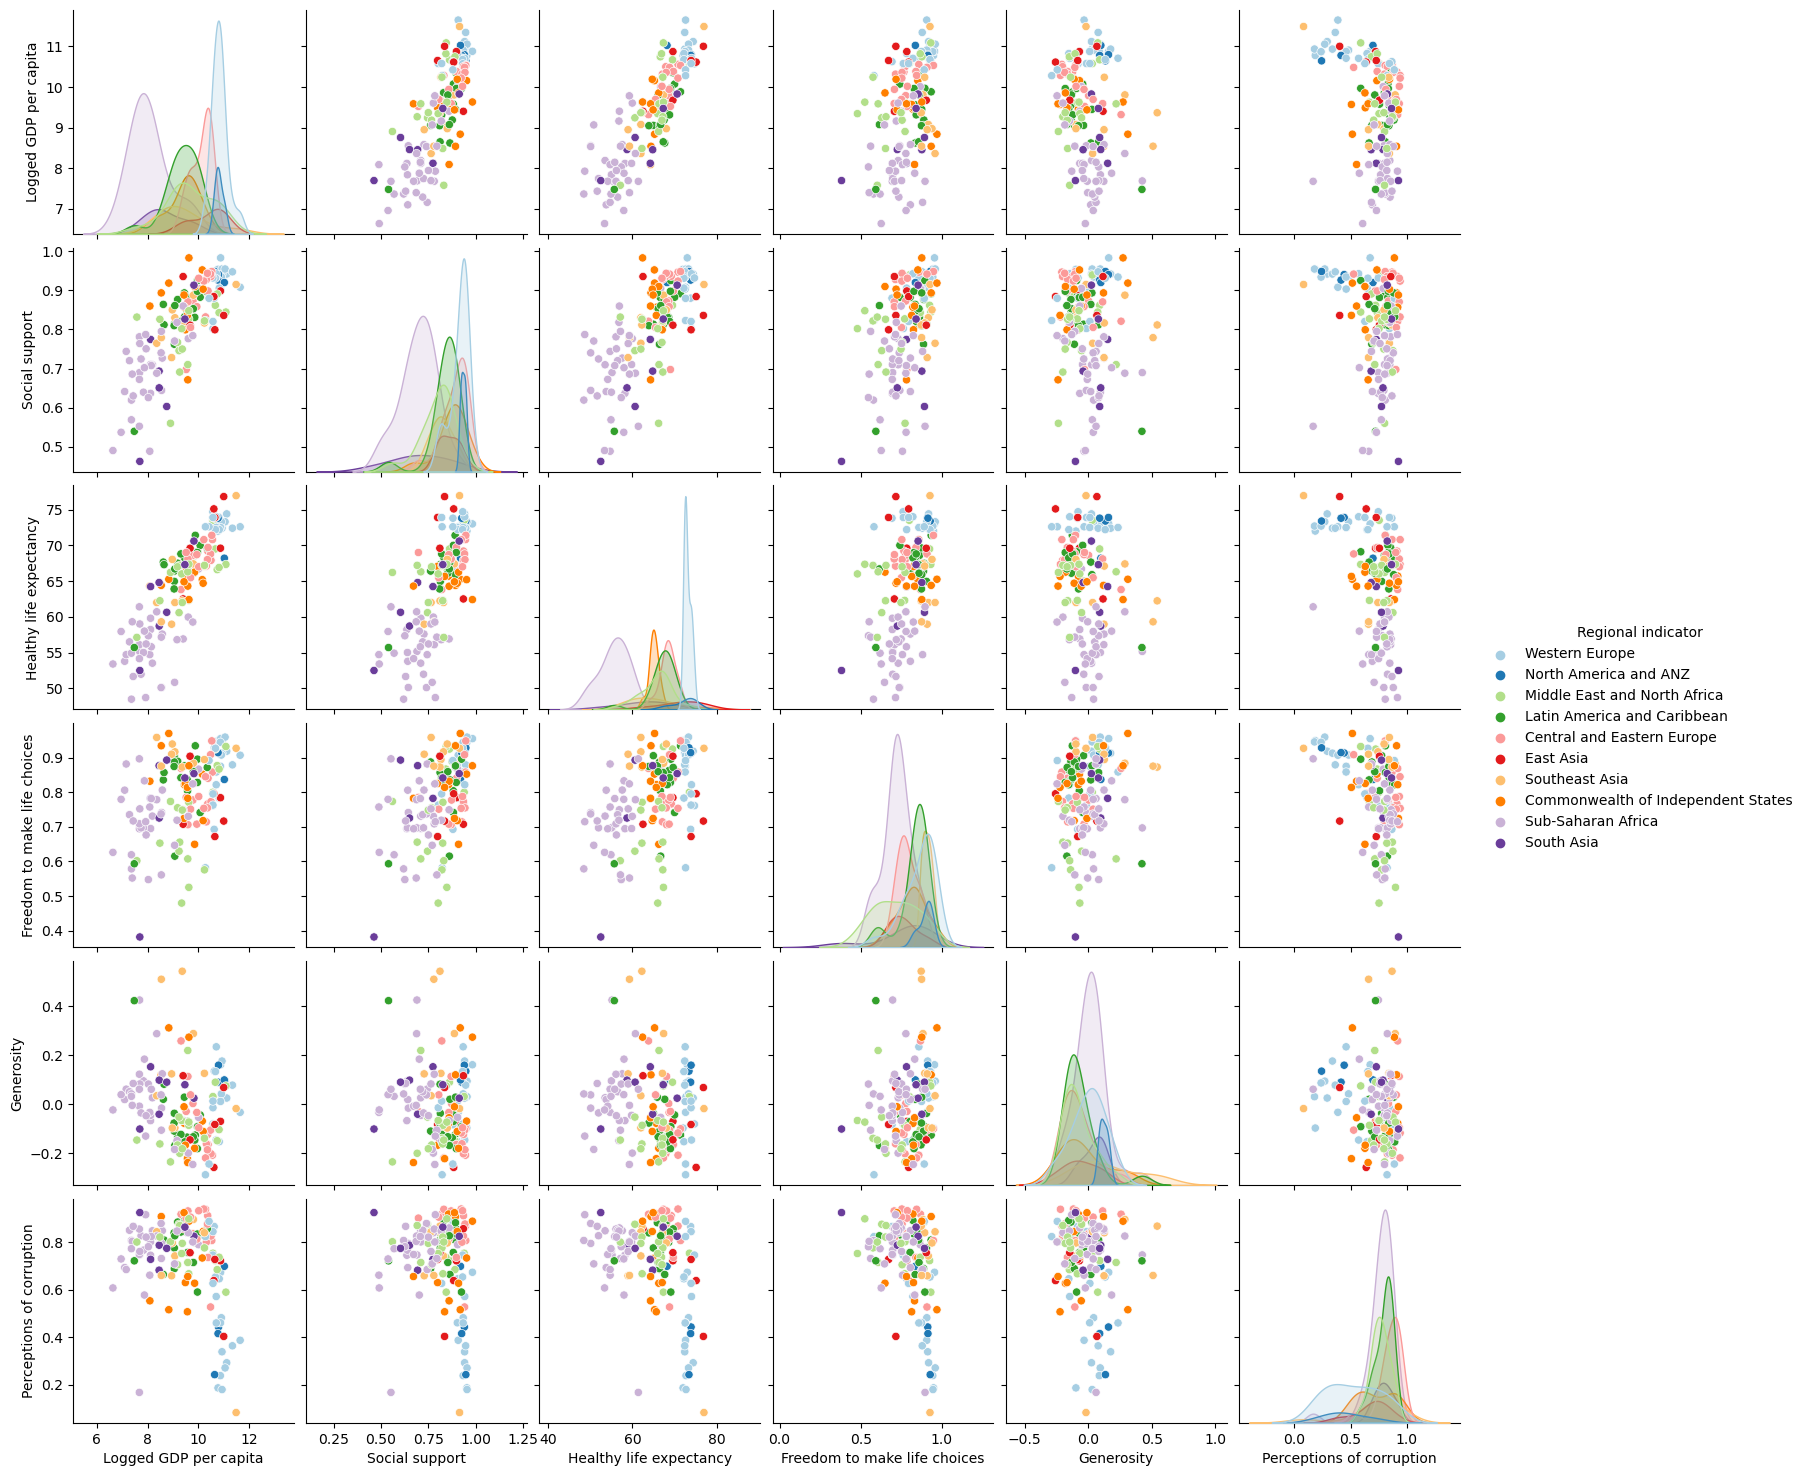

In [32]:
columns = ['Regional indicator','Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']

# do scatterplots with hue
sns.pairplot(df[columns], hue="Regional indicator", palette="Paired")

The *colourisation* could help us gain to insight like: Sub-Saharan African countries (the purple dots, according to the legend on the right) have the **lowest GDP and the lowest Healthy life expectancy, but they are not less generous than more fortunate countries**.

### Correlation

[Correlation](https://en.wikipedia.org/wiki/Correlation) is not assessed only by looking at a scatterplots, but using another useful EDA toolset: the correlation matrix.

In [52]:
meaningful_columns = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']

corr = df[meaningful_columns].corr()
corr

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.0000,0.7897,0.7570,0.7681,0.6077,-0.0178,-0.4210
Logged GDP per capita,0.7897,1.0000,0.7853,0.8595,0.4323,-0.1994,-0.3422
Social support,0.7570,0.7853,1.0000,0.7232,0.4831,-0.1150,-0.2034
Healthy life expectancy,0.7681,0.8595,0.7232,1.0000,0.4614,-0.1618,-0.3643
Freedom to make life choices,0.6077,0.4323,0.4831,0.4614,1.0000,0.1695,-0.4010
Generosity,-0.0178,-0.1994,-0.1150,-0.1618,0.1695,1.0000,-0.1639
Perceptions of corruption,-0.4210,-0.3422,-0.2034,-0.3643,-0.4010,-0.1639,1.0000


<Axes: >

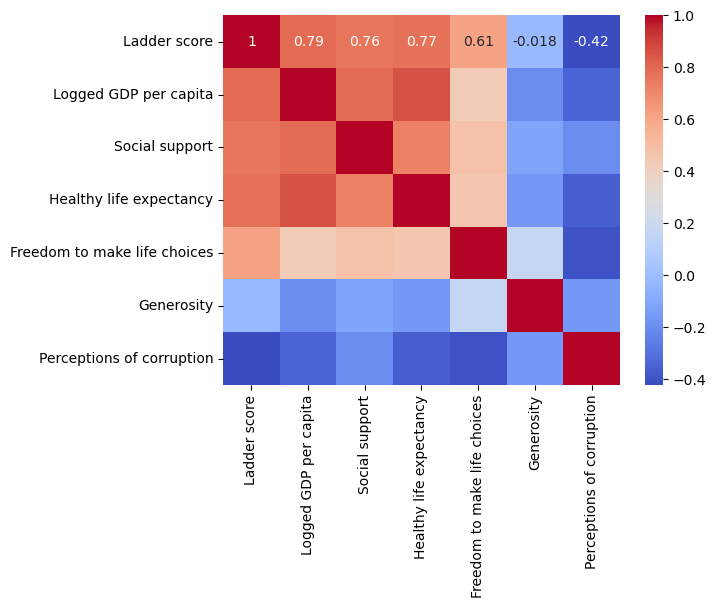

In [50]:
labels = corr.map(lambda v: v if v else '')
sns.heatmap(corr, annot=labels, fmt=".2g", cmap='coolwarm')

## Outliers

To spot outliers in our dataset we can use [Box and Whiskers](https://en.wikipedia.org/wiki/Box_plot) plot.

<Axes: >

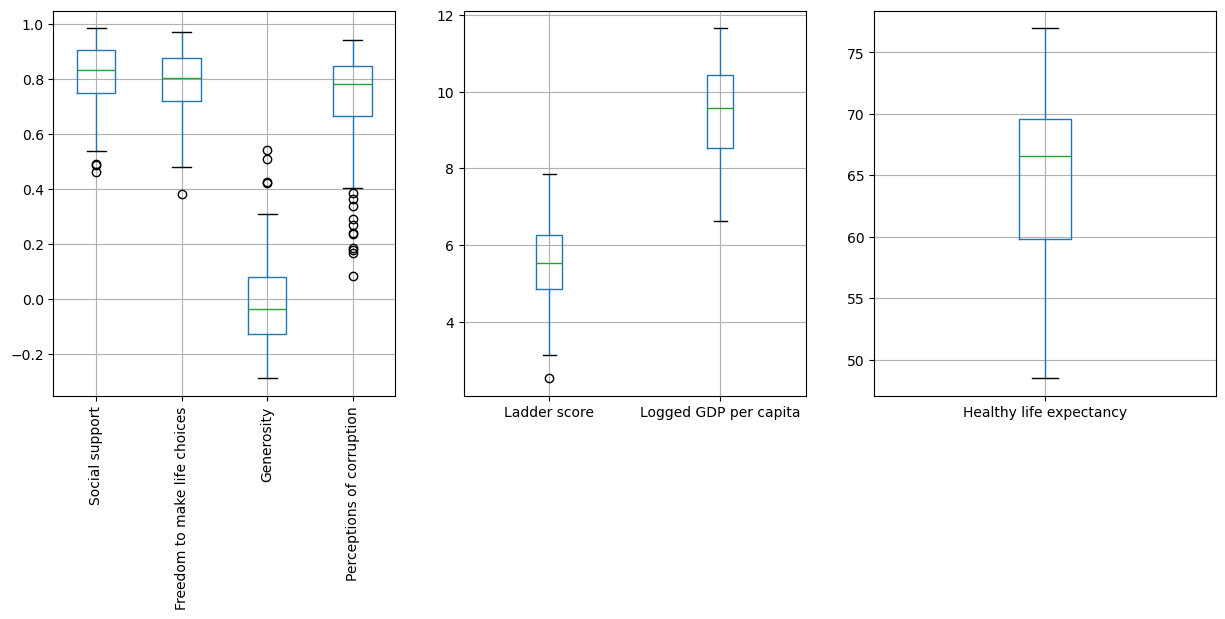

In [53]:
small = ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
medium = ['Ladder score', 'Logged GDP per capita']
large = ['Healthy life expectancy']

f, axs = plt.subplots(1,3,figsize=(15,5))

# equivalent but more general
ax1=plt.subplot(1, 3, 1)
df.boxplot(column=small, ax = ax1)
plt.xticks(rotation=90)

ax2=plt.subplot(1, 3, 2)
df.boxplot(column=medium, ax = ax2)

ax3=plt.subplot(1, 3, 3)
df.boxplot(column=large, ax = ax3)

The classical interpretation in Statistics is that whatever falls outside the *whiskers* represents an outlier. In practice, deciding what to do with outliers depends on many factors (it also could be a mistake in data collection, for example).

### Perceptions of corruption

/opt/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

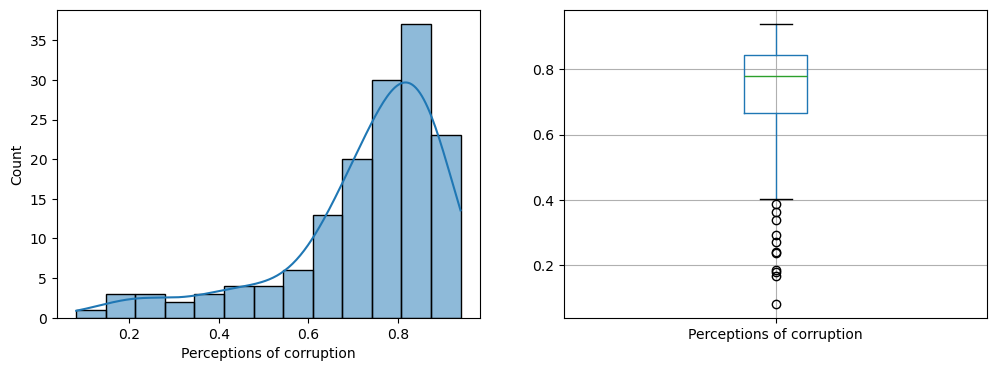

In [55]:
f, axs = plt.subplots(1,2,figsize=(12,4))

# equivalent but more general
ax1=plt.subplot(1, 2, 1)
sns.histplot(df['Perceptions of corruption'], kde=True, ax=ax1)

ax2=plt.subplot(1, 2, 2)
df.boxplot(column=['Perceptions of corruption'], ax = ax2)

Because *Perceptions of corruption* feature is left skewed, countries with lowest perception of corruption are automatically categorised as outliers in the boxplot. But just because they are technically outliers does not necessarily mean we should do something about them. 

### Is the data correct? 

Let's see who these outliers are:

In [60]:
# select rows with "Perceptions of corruption" < 0.4
rows = df[df['Perceptions of corruption'] < 0.4]

# select columns 'Country name', 'Perceptions of corruption' from the rows
rows = rows[['Country name', 'Perceptions of corruption']]

# sort the the rows
rows.sort_values(by = 'Perceptions of corruption', axis=0, ascending=True)


,Country name,Perceptions of corruption
31,Singapore,0.0820
146,Rwanda,0.1668
1,Denmark,0.1788
0,Finland,0.1858
6,Sweden,0.2375
8,New Zealand,0.2416
5,Norway,0.2700
2,Switzerland,0.2917
4,Netherlands,0.3379
14,Ireland,0.3632


It's no surprise to find almost all these countries in the bottom of the Perceptions of Corruption.

What is the *Perceptions of corruption* for our country?

In [63]:
rows = df[df['Country name'] == "Malaysia"]
rows[['Country name', 'Perceptions of corruption']]

,Country name,Perceptions of corruption
80,Malaysia,0.8393


### That's basically EDA in a nutshell.